# Лабораторна робота №10
## Отримання та візуалізація цифрових звукових даних
**Дата:** 13.05.2025

**Виконав:** Шавало Андрій

**Група:** ФЕС-21

### Мета
Зчитати дані зі звукового файлу та візуалізувати їх.

### Теоретичні відомості
Цифровий звуковий сигнал — це двійкові дані, де інформація кодується за допомогою семплів (числових значень форми хвилі на кожен момент часу)...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import scipy.fft
import random

file_path = 'audio.wav'  
y, sr = librosa.load(file_path, sr=None, mono=False)


In [ ]:
channels = 1 if len(y.shape) == 1 else y.shape[0]
samples = y.shape[-1]
duration = samples / sr
bit_depth = 16 
bitrate = sr * channels * bit_depth

print(f"Частота дискретизації: {sr} Гц")
print(f"Кількість каналів: {channels}")
print(f"Кількість відліків: {samples}")
print(f"Тривалість: {duration:.2f} секунд")
print(f"Бітрейт: {bitrate} біт/сек")


Частота дискретизації: 44100 Гц
Кількість каналів: 1
Кількість відліків: 77184
Тривалість: 1.75 секунд
Бітрейт: 705600 біт/сек


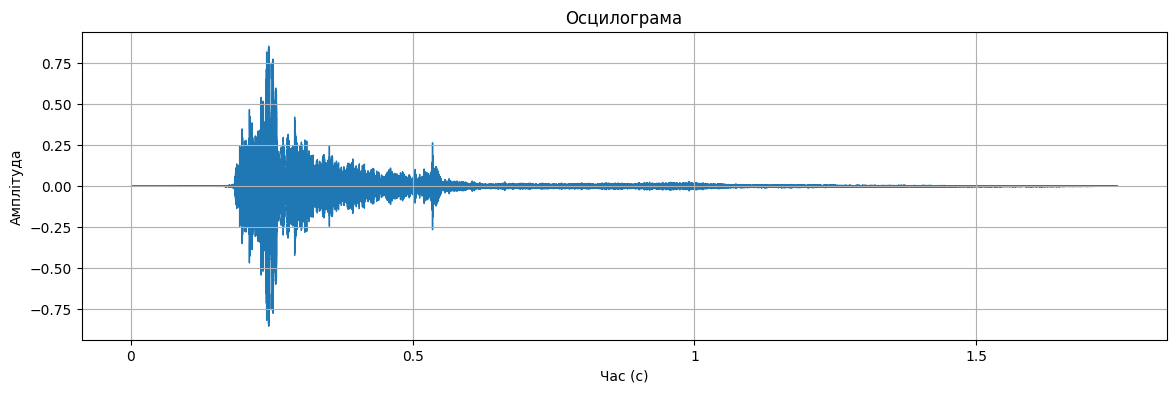

In [4]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Осцилограма')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.grid()
plt.show()


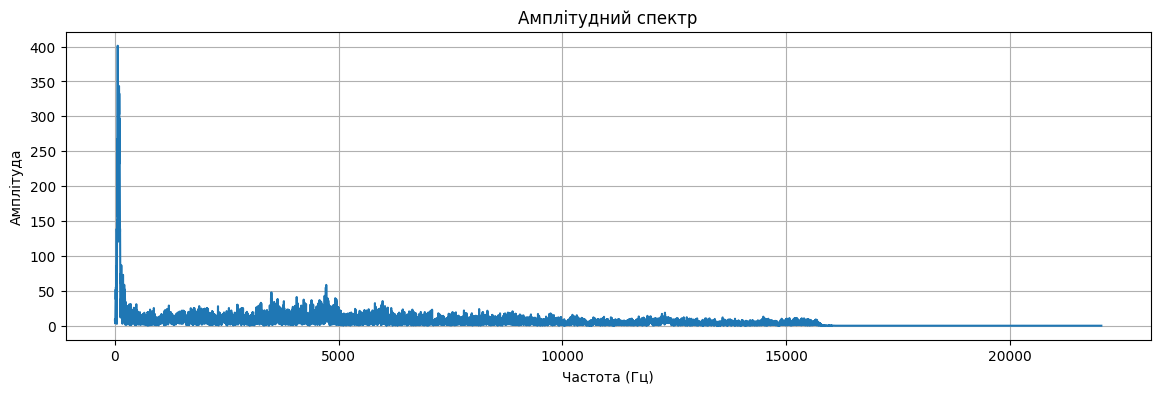

In [5]:
yf = scipy.fft.fft(y)
xf = np.linspace(0, sr, len(yf))

plt.figure(figsize=(14, 4))
plt.plot(xf[:len(yf)//2], np.abs(yf[:len(yf)//2]))
plt.title('Амплітудний спектр')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплітуда')
plt.grid()
plt.show()


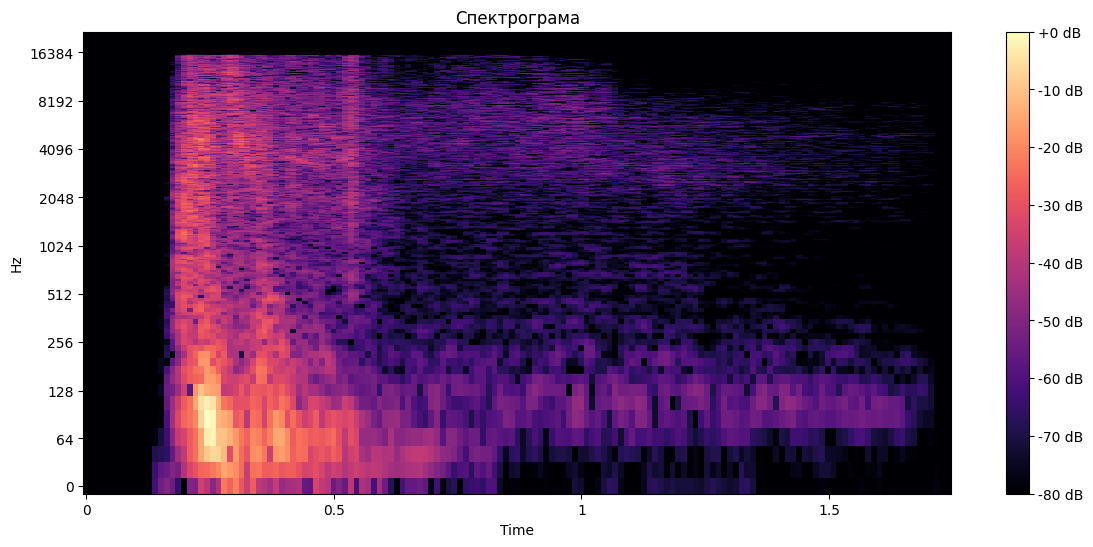

In [6]:
plt.figure(figsize=(14, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограма')
plt.show()


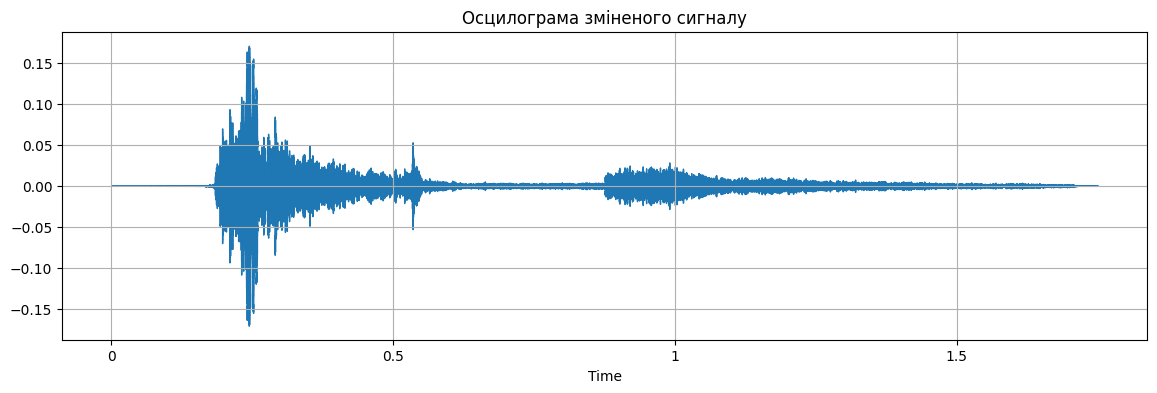

In [ ]:
y_mod = y.copy()
half = len(y) // 2
scale_factor = 0.2  
y_mod[:half] *= scale_factor

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y_mod, sr=sr)
plt.title('Осцилограма зміненого сигналу')
plt.grid()
plt.show()


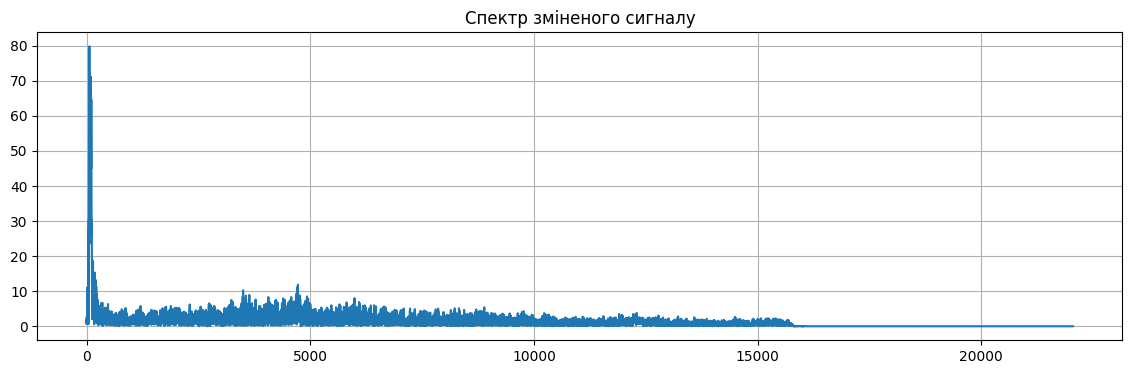

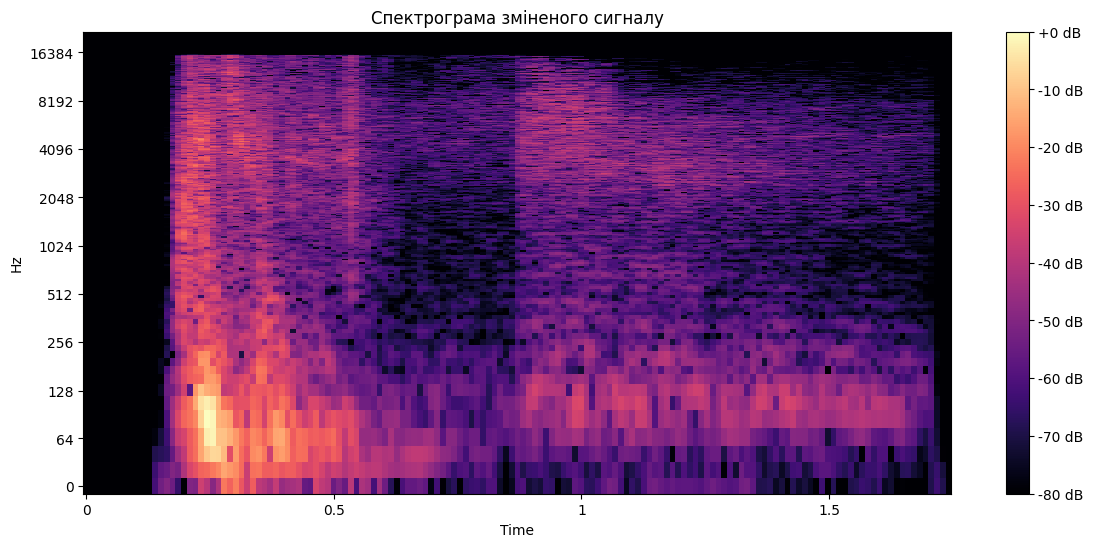

In [ ]:
yf_mod = scipy.fft.fft(y_mod)
plt.figure(figsize=(14, 4))
plt.plot(xf[:len(yf)//2], np.abs(yf_mod[:len(yf)//2]))
plt.title('Спектр зміненого сигналу')
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
D_mod = librosa.amplitude_to_db(np.abs(librosa.stft(y_mod)), ref=np.max)
librosa.display.specshow(D_mod, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограма зміненого сигналу')
plt.show()


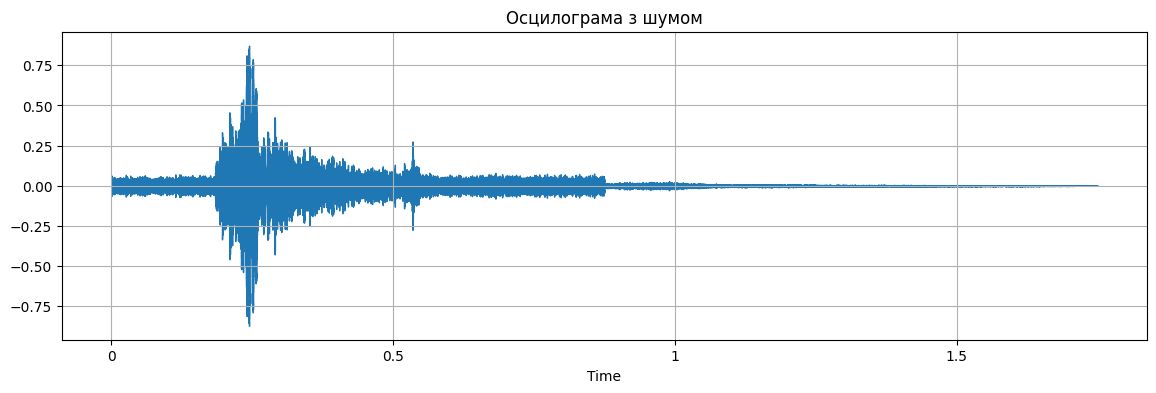

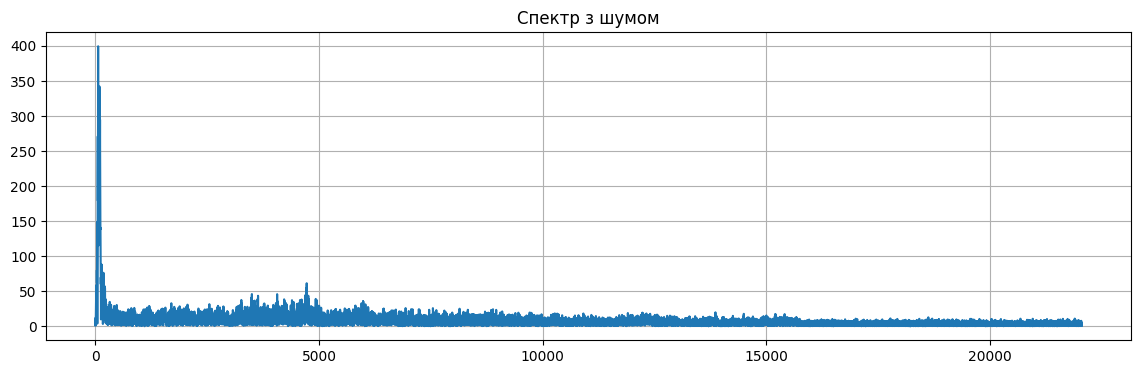

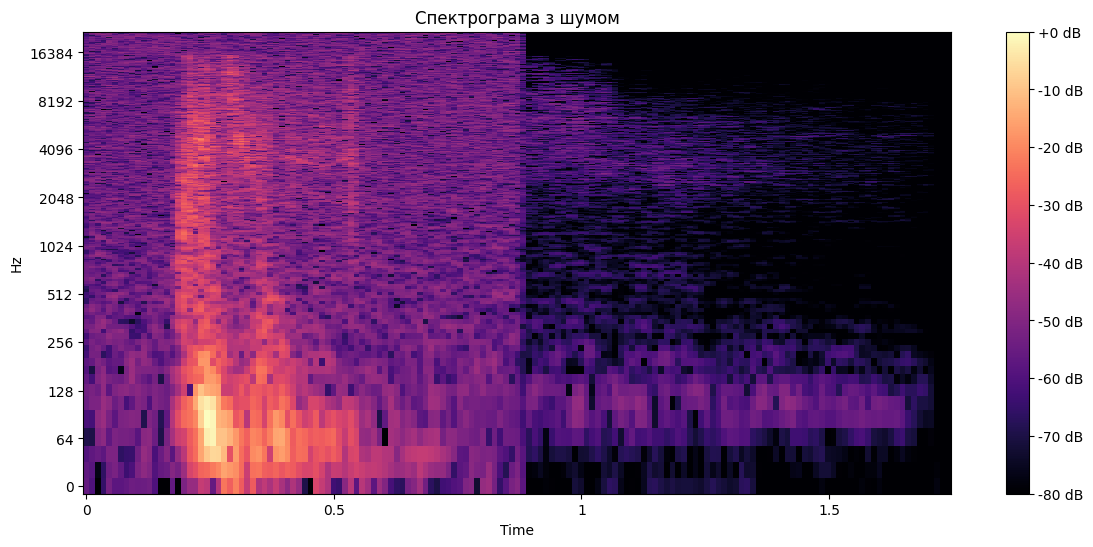

In [ ]:
y_noise = y.copy()
noise = np.random.normal(0, 0.02, size=half)
y_noise[:half] += noise

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y_noise, sr=sr)
plt.title('Осцилограма з шумом')
plt.grid()
plt.show()

yf_noise = scipy.fft.fft(y_noise)
plt.figure(figsize=(14, 4))
plt.plot(xf[:len(yf)//2], np.abs(yf_noise[:len(yf)//2]))
plt.title('Спектр з шумом')
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
D_noise = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise)), ref=np.max)
librosa.display.specshow(D_noise, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограма з шумом')
plt.show()


### Аналіз

1. **Осцилограма** показує, як змінюється амплітуда сигналу з часом.
2. **Спектр** дає уявлення про частотний склад сигналу.
3. **Спектрограма** комбінує час і частоту, дозволяючи побачити зміну частотного складу у часі.

Найінформативнішою є спектрограма, бо вона надає як часову, так і частотну інформацію.

### Пояснення термінів

- **Частота дискретизації** — кількість відліків (семплів) за секунду.
- **Кількість каналів** — моно (1 канал) чи стерео (2 канали).
- **Біт на число** — глибина бітів: скільки біт використовують для представлення одного відліку.
- **Бітрейд/байтрейд** — скільки біт/байт передається за секунду.
